# Project Coronavirus 
## Having a look into the situation amongst the Coronavirus in 5 specific countries
---------------

As part of the Data Science Bootcamp of The Bridge we are doing an Exploratory Data Analysis of the coronavirus in the following 5 specific countries: 

    - Spain
    - The Netherlands
    - Mexico
    - Iran
    - Brazil

To have a better understanding of the development of the virus in these countries and the comparison of this between all the countries we will be following the next steps:

1. Gathering the Data.
2. Creating api and gathering data from api.
3. Cleaning and filtering the data.
4. Studying and visualizing the data.
5. Drawing conclusions.
6. Checking for outliers


We will import the following libraries to use in our data analysis:

In [1]:
os.path.abspath('')
root_path = os.path.dirname(os.path.abspath(''))
sys.path.append(root_path)

import pandas as pd
import numpy as np
import os, sys
from flask import Flask, render_template, redirect, request, jsonify 
import missingno
import time
import random
import json
import seaborn as sns
import matplotlib.pyplot  as plt
from utils.apis_tb import dfjson

### 1. Importing data

We are importing the data in csv format from the following website: covid.ourworldindata.org. As the data will be updated daily we will use the link instead of downloading the csv file directly to be sure and the dataset is up to date everytime we use it. 

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [6]:
data.shape

(34873, 36)

As this dataset contains the data of all the countries we will start with filtering the dataset so we will only have the data relevant for our countries: Spain, The Netherlands, Mexico, Iran and Brazil:

In [3]:
#Filtering our countries from dataset
Data_all_countries = data[(data.location == "Spain") | (data.location == "Iran") | (data.location == "Netherlands") | (data.location == "Mexico") | (data.location == "Brazil")] 

### 2.API

As part of the project we will create a dataframe with the mean total cases of all our countries. We will send this dataframe in an Api to another group of our bootcamp. Here we will create the Json file that we will later use in the Api. Please find more information of the Api in in the file: Apis_tb.py.

In [10]:
#Creating the Json
dfjson(Data_all_countries)

'se ha cargado el archivo mean.json en el path'

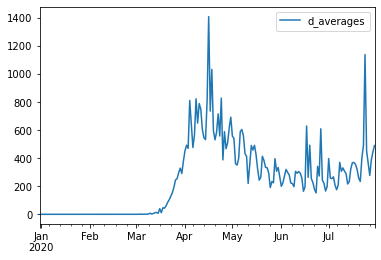

In [23]:
#Unforuntaley it was not possible to retrieve the Json from the api of the other group. Therefor we downloaded the Json file, read it and plotted it. 
df_averages= pd.read_json("d_averages.json")
df_averages.plot()

### 3. Cleaning the dataset

Now that we have the dataset with the information of only the necessary countries. We will further clean the data with by looking at the following things:

1.Check the types of the columns and changing the date column to a datetime64 type and setting it as our index.

2.Checking the data for any Nan values.

3.Checking for duplicates in the data.

4.Dropping irrelevant columns

First we will start checking the types and specifcally the type of the date column.

In [14]:
Data_all_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 4499 to 29469
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         1094 non-null   object 
 1   continent                        1094 non-null   object 
 2   location                         1094 non-null   object 
 3   date                             1094 non-null   object 
 4   total_cases                      1086 non-null   float64
 5   new_cases                        1086 non-null   float64
 6   total_deaths                     1086 non-null   float64
 7   new_deaths                       1086 non-null   float64
 8   total_cases_per_million          1086 non-null   float64
 9   new_cases_per_million            1086 non-null   float64
 10  total_deaths_per_million         1086 non-null   float64
 11  new_deaths_per_million           1086 non-null   float64
 12  new_tests       

In [4]:
#Changing date to datetime64 type and setting as index, saving the data in a new variable: data_covid which we will further continue to use.

Data_all_countries.date = pd.to_datetime(Data_all_countries.date) 
data_covid = Data_all_countries.set_index("date")
data_covid

C:\Users\Roxan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-03,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-04,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-02,ESP,Europe,Spain,288522.0,0.0,28445.0,0.0,6170.962,0.000,608.387,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
2020-08-03,ESP,Europe,Spain,297054.0,8532.0,28472.0,27.0,6353.446,182.484,608.964,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
2020-08-04,ESP,Europe,Spain,302814.0,5760.0,28498.0,26.0,6476.642,123.196,609.521,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56


Now we will continue having a look at the missing values.


Preview of data with null values:


,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


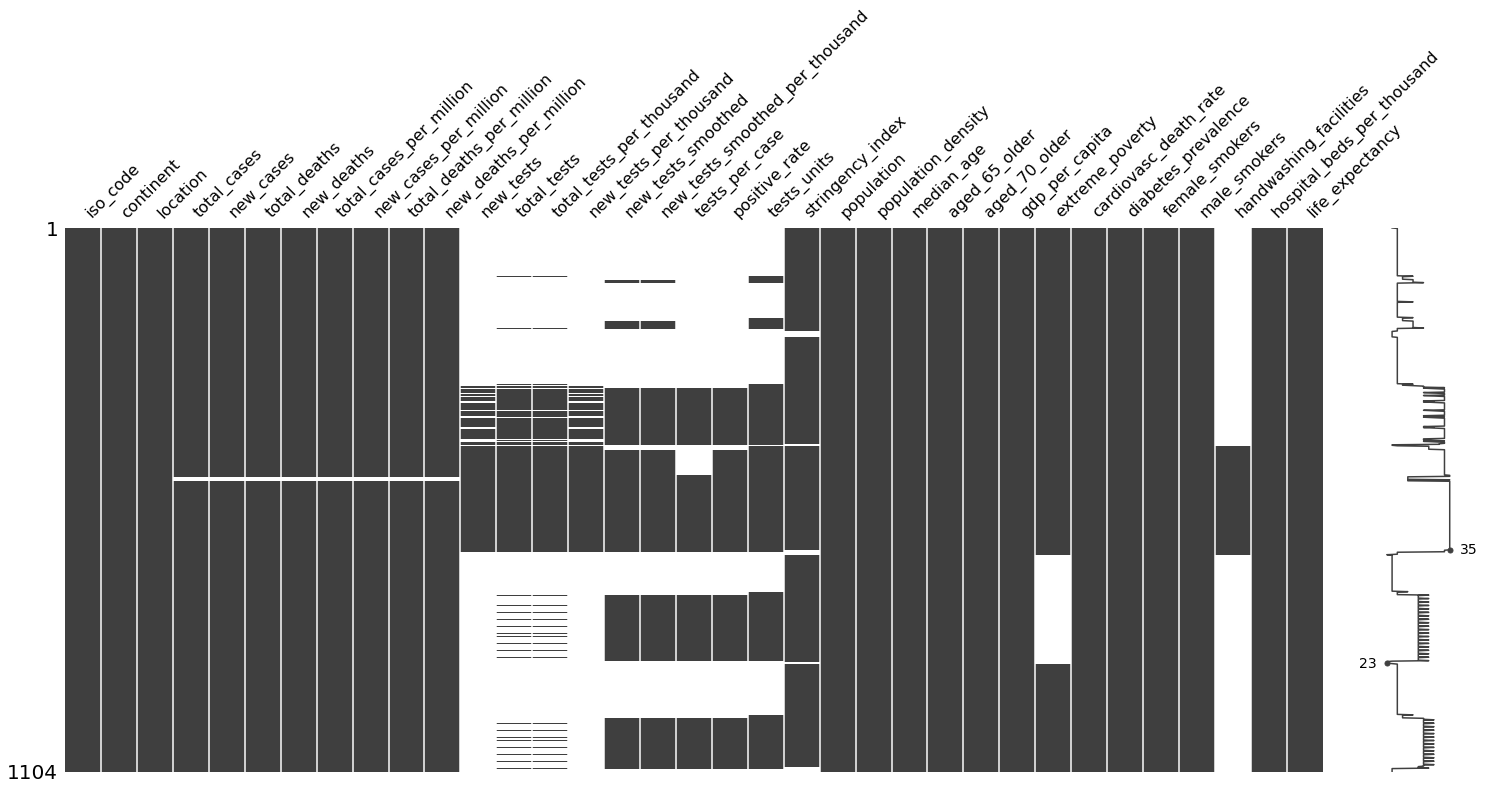

In [5]:
# generate preview of entries with null values. The white spaces demonstrate missing data.
if len(data_covid[data_covid.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:")
    display(data_covid[data_covid.isnull().any(axis=1)].head(3))
    missingno.matrix(data_covid)
    plt.show()

As we can see from the previews above, there are quite some columns with missing data (NaN data). We have decided to remove all the columns regarding "test" as there is not enough information to actually draw conlusions. The same goes for the "stringecy_index", "extreme_poverty" and the "handwashing facilities column". Also we can see there are a few missing data in columns regarding the cases and deaths. We will remove the rows that only have NaN values to make sure we only have usefull data left.  

In [6]:
#Removing the columns with too many NaN values:
data_covid.drop(["new_tests", "total_tests", "total_tests_per_thousand", "new_tests_per_thousand", "tests_units", "new_tests_smoothed", "new_tests_smoothed_per_thousand", "stringency_index", "extreme_poverty", "handwashing_facilities"], axis=1, inplace=True)


In [7]:
#Removing rows with only NaN values.
data_covid.dropna(axis=0, how="all", inplace=True)


Now that we have checked the missing values, we will continue with the duplicated values.

In [8]:
#generate count statistics of duplicate entries

if len(data_covid[data_covid.duplicated()]) > 0:
    print("\n***Number of duplicated entries: ", len(data_covid[data_covid.duplicated()]))
    display(data_covid[data_covid.duplicated(keep=False)].sort_values(by=list(data_covid.columns)).head())
else:
    print("\nNo duplicated entries found")


***Number of duplicated entries:  278


,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-03,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-04,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88


We can see that there are quite some duplicated values. This was to be expected as the dates from last year of the cases will be 0 as the Corona virus then was not (as) active yet and it will remain 0 until the virus is spreading in a particular country. We have decided to delete the duplicated values to clean the dataframe and have a clearer overview when visualizing the data.

In [9]:
#removing duplicated values. ## TODO maybe change this?? not sure if we want to remove all the duplicates?
data_covid.drop_duplicates(inplace=True)

Now that the dataset is already quite clean and ready to be used and analised, we will finally have a citical look at the columns within our dataset to see if we really need all of them. 

In [27]:
data_covid.columns

Index(['location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'tests_per_case',
       'positive_rate', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand'],
      dtype='object')

As it is important to only delete the columns that we know for certain that do not have added value for our data study we will for now only remove: 'iso_code', 'continent', 'gdp_per_capita', 'life_expectancy', 'cardiovasc_death_rate' and 'diabetes_prevalence'.

In [10]:
#removing the columns that have irrelevant data for our study. # TODO have a look if we want to remove other columns as well. Depends on what we are actually analising.. hypothesis?
data_covid.drop(['iso_code', 'continent','gdp_per_capita','life_expectancy', 'cardiovasc_death_rate', 'diabetes_prevalence'], axis=1, inplace=True)

### 4. Studying and visualizing the data

In order to analyse our data we have decided to split this part into 2 sections. First we will have a look at each individual country, plotting the columns and drawing conclusions. Secondly we will also be looking at the comparison of the data of all our countries and see which conlusions we can make in this, taking into account the observations we made before of each country.

#### 4.1 Taking a look at the situation of each individual country.
* The Netherlands

The Netherlands did not have an alarm state. However, they did put into place a so called "intelligent lockdown". This lockdown started the 23rd of March 2020. It is a bit harder to specify an end date of this lockdown as the government of The Netherlands is going to ease the restriction in several phases. The last phase will take place on the first of September. Therefor we have decided to not put and end date on the "alarm state" for this country yet. Sources: https://www.hartvannederland.nl/nieuws/2020/stappenplan-nederland-uit-lockdown/
https://nl.wikipedia.org/wiki/Coronacrisis_in_Nederland

In [11]:
#Filtering the dataset for the data of The Netherlands.
netherlands = data_covid[data_covid.location == "Netherlands"]


We will be having a look at the total and daily cases and deaths in The Netherlands. For now we will only take into account the total amount of cases and deaths. The cases and deaths per million we will use later for the comparison with the other countries.

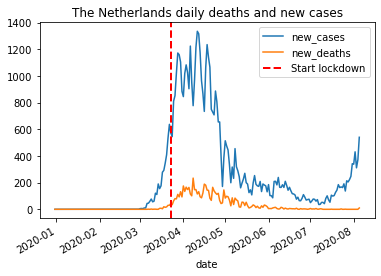

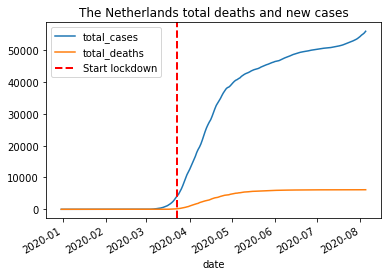

In [115]:
#Plotting the curves of the new cases and deaths and the total cases and deaths, showing vertically the start date of the alarm state. 
ax = netherlands[["new_cases", "new_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("The Netherlands daily deaths and new cases")
plt.legend()

ax = netherlands[["total_cases", "total_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("The Netherlands total deaths and new cases")
plt.legend()

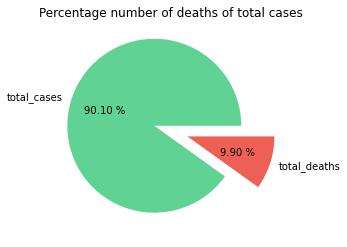

In [46]:
#percentage total deaths of the total cases.
cases = netherlands[["total_cases", "total_deaths"]].max().loc["total_cases"]
deaths = netherlands[["total_cases", "total_deaths"]].max().loc["total_deaths"]

mx_x = [cases, deaths]
mx_y = ["total_cases","total_deaths"]
desfase = (0.2,0.2)
colores =  ["#60D394","#EE6055"]
plt.pie(mx_x, labels=mx_y, autopct="%0.2f %%", colors=colores, explode=desfase)
plt.title("Percentage number of deaths of total cases")
plt.show()


We can conclude that from the beginning of the intelligent lockdown the number of total cases has rapidly increased and although the curve is starting to flatten, it is still slowly increasing. The total number of deaths, however, has only slightly increased since the start of the lockdown and the curve has flattened rapidly. When looking at the daily cases and deaths, we can see the daily new cases in the beginning of the lockdown has was increasing, but after a month had a significant decrease. However at the end of July / beginning of August there is another increase of daily cases. This would make sense taking into consideration that several phases of indicating the end of the intelligent lockdown already took place, therefore causing another increase. 

* Spain

The alarmstate in Spain began on the 14th of March 2020 and ended on the 21st of June 2020. During the alarmstate the country has been in a strict lockdown. Source: https://es.usembassy.gov/health-alert-06182020/ 

In [12]:
#Filtering the dataset for the data of The Netherlands.
spain = data_covid[data_covid.location == "Spain"]

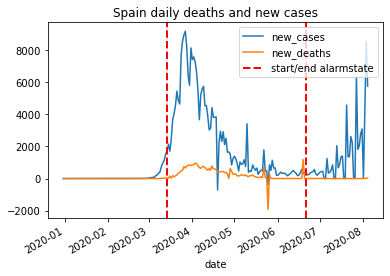

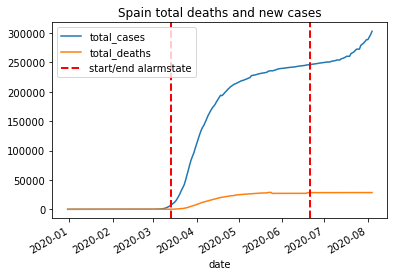

In [117]:
#Plotting the curves of the new cases and deaths and the total cases and deaths, showing vertically the start date and end date of the alarm state. 
ax = spain[["new_cases", "new_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-14'), color='r', linestyle='--', lw=2, label="start/end alarmstate")
ax.axvline(pd.to_datetime('2020-06-21'), color='r', linestyle='--', lw=2)
plt.title("Spain daily deaths and new cases")
plt.legend()

ax = spain[["total_cases", "total_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-14'), color='r', linestyle='--', lw=2, label="start/end alarmstate")
ax.axvline(pd.to_datetime('2020-06-21'), color='r', linestyle='--', lw=2)
plt.title("Spain total deaths and new cases")
plt.legend()

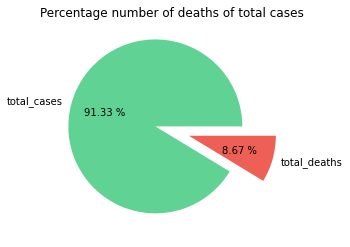

In [47]:
#percentage total deaths of the total cases.
cases = spain[["total_cases", "total_deaths"]].max().loc["total_cases"]
deaths = spain[["total_cases", "total_deaths"]].max().loc["total_deaths"]

mx_x = [cases, deaths]
mx_y = ["total_cases","total_deaths"]
desfase = (0.2,0.2)
colores =  ["#60D394","#EE6055"]
plt.pie(mx_x, labels=mx_y, autopct="%0.2f %%", colors=colores, explode=desfase)
plt.title("Percentage number of deaths of total cases")
plt.show()

Looking at the graph of Spain we can cearly see a decrease of the new cases and deaths during the period of the alarmstate. Also, after the end of the alarmstate we can see another increase of new cases, while the number of new deaths stays has plateaued. Interesting to note is that the number of new deaths has a negative number around June 2020. This is causes by revision made by the Spanish government on the countries death toll. They have revised the amount by nearly 2,000 people as, according to Spanish goverment, some cases were counted twice and also to exclude deaths wrongly attributed to the virus. Source: https://www.thelocal.es/20200526/spain-revises-its-coronavirus-death-toll-by-nearly-2000-cases


* México

The "quarantine" in Mexico began on March 30, 2020. His first case in Jalisco, Mx, from Wuhan, China was on January 13, to according to his official website. https://www.gob.mx/cms/uploads/attachment/file/528534/Comunicado_Tecnico_CORONAVIRUS_24_DE_ENERO.pdf 

In [13]:
##Filtering the dataset for the data of Mexico.
data_mexico = data_covid[data_covid.location == "Mexico"]

In [13]:
# As Mexico has some missing values which can cause problems in the plot, we will be filling the NaN values with the value of the day before, assuming the reason for the NaN value is there is no update made since the day before.
data_mexico.fillna(method='ffill', inplace=True)

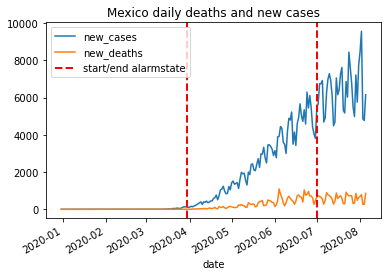

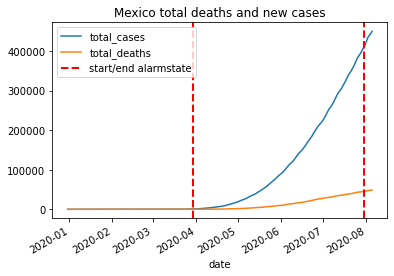

In [14]:
#México relation new cases, new deaths. 
ax = data_mexico[["new_cases", "new_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-30'), color='r', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2020-07-01'), color='r', linestyle='--', lw=2, label="start/end alarmstate")
plt.title("Mexico daily deaths and new cases", color= 'black')
plt.legend()


ax = data_mexico[["total_cases", "total_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-30'), color='r', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2020-07-30'), color='r', linestyle='--', lw=2, label="start/end alarmstate")
plt.title("Mexico total deaths and new cases")
plt.legend()

 -total test= 1011050
 -total population= 125000000

    The mortality in México for Covid is 9.66%
    Their case and mortality data are constantly adjusting.
    They fail to flatten the infection curve.

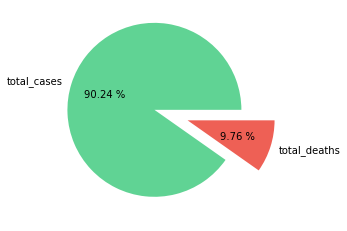

In [35]:
# With these data, we can see that the mortality rate is 9.66%
n_mx= data_mexico.tail(1)
mx_x = [443813.0,48012.0,	4767.0,	266.0]
mx_y = ["total_cases","total_deaths","new_cases","new_deaths"]
desfase = (0.2,0.2 , 0.3, 1)
colores =  ["#60D394","#EE6055","#AAF683","#FFD97D","#FF9B85"]
plt.pie(mx_x, labels=mx_y, autopct="%0.2f %%", colors=colores, explode=desfase)
plt.show()

* Iran

In [15]:
#Filtering the dataset for the data of Iran.
iran = data_covid[data_covid.location == "Iran"]

In [ ]:
#Plotting the curves of the new cases and deaths and the total cases and deaths, showing vertically the start date of the alarm state. 
ax = iran[["new_cases", "new_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-25'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("The Iran´s daily deaths and new cases")
plt.legend()

ax = iran[["total_cases", "total_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-25'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("The Iran´s total deaths and new cases")
plt.legend()

On March 25th, Iran started the first exceptional measures and some of them are still being enforced until today. The alarm state in Iran conveys local measures like the prohibition to move from one province to another since March 25th, but they didn't include a home lockdown or to totally stop all social and economical activities. Gradually, these measures have been relaxing over the time in order to slow down the pandemic but some of them are still being enforced.

In April, Iran began to ease its restrictions as daily infections fell:

20 April: Shopping malls and bazaars reopened and travel resumed between different provinces
22 April: Public parks and recreation areas reopened
12 May: Government allowed all mosques to reopen
25 May: Major Shia religious shrines reopened
26 May: Restaurants, cafes, museums and historical sites reopened

As we can prove, the measures taken to stop the pandemic had an effect in the very next days, as the contagious cases diminished. The relaxation taken from April 20th has been liked to the number of new contagious cases. The most noticeable peak overlaps with the permission to re-open restaurants, coffee shops, tourism locations and places of religious worship.

It exists an strong informative barrier, which can't discard a possible manipulation of the data, on the government's behalf. Due to it, it's advised to take this date with precaution . According to BBC information on August 3th of 2020, the real number of contagious cases and deaths related to Covid -19 could quadruplicate the official numbers.


It is visible on the daily deaths Covid related's graphic, a negative amount that matches an adjustment on wrongfuly death related Covid-19 cases. Source: https://www.bbc.com/news/world-middle-east-51930856 https://www.bbc.com/news/world-middle-east-53598965

* Brazil

Brazil declared a public health emergency in early March (on the 17th of March 2020), just a few days after the World Health Organization. The Ministry of Health urged state officials to cancel public events and put social-distancing measures in place.

Despite non-essential businesses reopened on 9th of June 2020 in the city of Rio de Janeiro, the easing of restrictions marks the beginning of six phases of reopening planned by officials. This is the reason why we decided not to display the end of the "alarm state" as it hasn´t concluded yet.

However, the conflicting messages from the government left Brazilians uncertain about isolation measures, which led to low compliance. That in turn led to Brazil’s caseload being one of the highest in the world. Sources:

https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Brazil
https://covid19.who.int/region/amro/country/br

In [16]:
#Setting to display complete contents of our dataframe without any kind of truncation.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-16-e99dfd94ba4c>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


We will need to have a look the whole dataset without any truncation as we want to make sure we are taking into account only the useful information for our case.

In [17]:
#Filtering the dataset for the data of Brazil and displaying all rows and columns to explore the dataset.
Brazil = data_covid[data_covid.location == "Brazil"]

We just filtered our dataset , as we are about to have a look the increasement of cases and deaths in Brazil from the very begining of alarm state until 8th May 2020.

In [18]:
#Drpping rows with unnecessary data
Brazil=Brazil.drop(Brazil.index[[0]]) 
Brazil.head(10)

,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,tests_per_case,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,hospital_beds_per_thousand
date,,,,,,,,,,,,,,,,,,,
2020-02-26,Brazil,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-02-27,Brazil,1.0,0.0,0.0,0.0,0.005,0.000,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-01,Brazil,2.0,1.0,0.0,0.0,0.009,0.005,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-02,Brazil,2.0,0.0,0.0,0.0,0.009,0.000,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-05,Brazil,3.0,1.0,0.0,0.0,0.014,0.005,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-06,Brazil,8.0,5.0,0.0,0.0,0.038,0.024,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-07,Brazil,13.0,5.0,0.0,0.0,0.061,0.024,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-08,Brazil,13.0,0.0,0.0,0.0,0.061,0.000,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-09,Brazil,25.0,12.0,0.0,0.0,0.118,0.056,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2


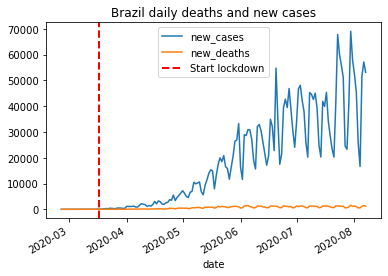

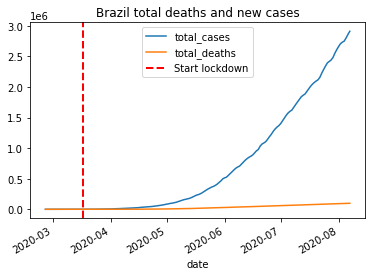

In [19]:
#Plotting the curves of the new cases and deaths and the total cases and deaths, showing vertically the start date of the alarm state. 
Br = Brazil[["new_cases", "new_deaths"]].plot()
Br.axvline(pd.to_datetime('2020-03-17'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("Brazil daily deaths and new cases")
plt.legend()

Br = Brazil[["total_cases", "total_deaths"]].plot()
Br.axvline(pd.to_datetime('2020-03-17'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("Brazil total deaths and new cases")
plt.legend()

Always taking into account the official data provided by the Brazilian government, on the first graph we can see that the new daily cases curve growing up very rapidly. This is the reason and why deaths curve looks so flat in comparison to "new cases" curve. Still, we must sign that the "new cases" line is falling down (very softly) at the end of our graph as a result of the partial isolation measures that the Brazilian government has been taking in different cities.

Something similar happens on the second graph, where the "total cases" curve overshadows the total deaths by proportional aspects.

In any case, we cannot underestimate the relevance of total deaths curve, which reachs the number of 95,819 people in total by 8th May 2020.

Sources:

https://www.worldometers.info/coronavirus/
http://www.brazil.gov.br/

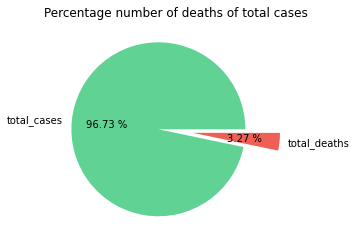

In [20]:
#percentage total deaths of the total cases.
cases = Brazil[["total_cases", "total_deaths"]].max().loc["total_cases"]
deaths = Brazil[["total_cases", "total_deaths"]].max().loc["total_deaths"]

mx_x = [cases, deaths]
mx_y = ["total_cases","total_deaths"]
desfase = (0.2,0.2)
colores =  ["#60D394","#EE6055"]
plt.pie(mx_x, labels=mx_y, autopct="%0.2f %%", colors=colores, explode=desfase)
plt.title("Percentage number of deaths of total cases")
plt.show()

Despite a drop in new cases in Brazil’s biggest cities, the number of new infections and deaths has plateaued at a high level as the virus spreads to the vast countryside and in smaller towns.

As a conclusion and having a look once again our graphs, we can see that the peak of new daily cases curve reached its maximum in late May. Even with government restrictions, the slightly improved curves are still in a critical phase. As graph number one shows us, flattening these curves will take very long and slow. Sources:

http://www.brazil.gov.br/ https://www.gov.br/acessoainformacao/pt-br https://www.who.int/emergencies/diseases/novel-coronavirus-2019/technical-guidance

#### 4.2 Looking at the comparison of the situation of all the countries.

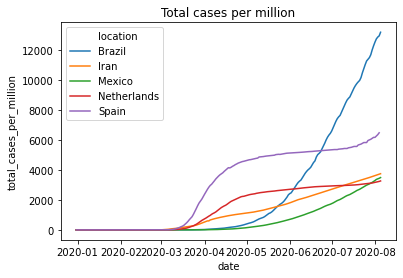

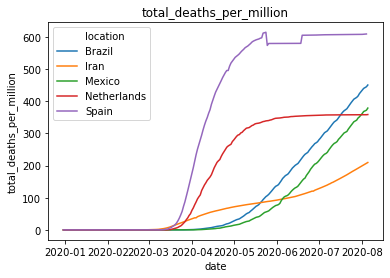

In [40]:
##Having a look at the total cases and total deaths per million in each country
total_cases_all_countries = sns.lineplot(
    x=data_covid.index,
    y="total_cases_per_million",
    hue='location',
    data=data_covid
).set_title('Total cases per million')
plt.show()

total_deaths_all_countries = sns.lineplot(
    x=data_covid.index,
    y="total_deaths_per_million",
    hue='location',
    data=data_covid
).set_title('total_deaths_per_million')
plt.show()

* Total cases per million: Looking at the first graph we can conclude that the cases in Brazil started increasing at a later state than the other countries. However, now that they are increasing, the amount of cases are growing more rapidtly than any other country. Another observation is that the amount of cases Mexico and Iran is the lowest of all countries, but still slowly increasing. The curve of The Netherlands and Spain have both flattened over time. However, it is notacable that the cases in  both countries from July onward are increasing again, the curve of Spain having a steeper incline than the Netherlands.
* Total deatch per million: #Still to do

Text(0.5, 0, '')

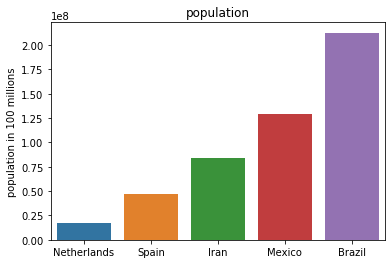

In [42]:
##Having a look at the population of each country.
data_population = data_covid.groupby("location")["population"].mean().reset_index()
data_population.sort_values(by="population", inplace=True)
sns.barplot(x=data_population.location, y=data_population.population, data=data_population)
plt.title("population")
plt.ylabel("population in 100 millions")
plt.xlabel(None)

Text(0.5, 0, '')

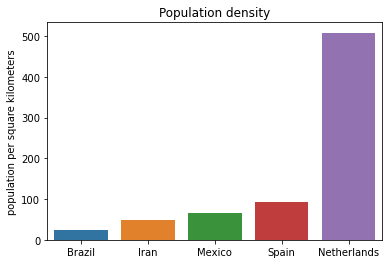

In [44]:
#Having a look at the population density, thus the number of people divided by land area (measured in square kilometers)
data_population_density = data_covid.groupby("location")["population_density"].mean().reset_index()
data_population_density.sort_values(by="population_density", inplace=True)
sns.barplot(x=data_population_density.location, y=data_population_density.population_density, data=data_population_density)
plt.title("Population density")
plt.ylabel("population per square kilometers")
plt.xlabel(None)

Text(0.5, 0, 'Country')

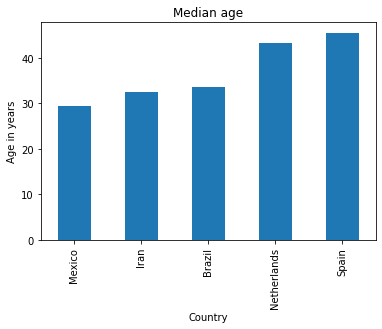

In [46]:
# plotting median age comparison
data_ages_median = data_covid.groupby("location")["median_age"].mean()
data_ages_median.sort_values(inplace=True)
data_ages_median.plot.bar()
plt.title("Median age")
plt.ylabel('Age in years')
plt.xlabel('Country')

Text(0.5, 0, 'Country')

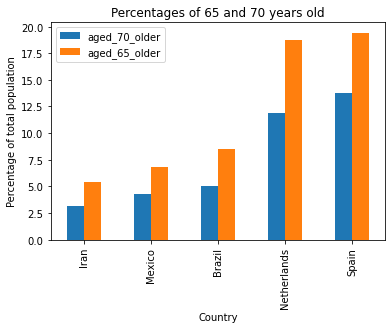

In [48]:
#plotting comparison of percentage 65 and 70 years old of all countries.
data_ages = data_covid.groupby("location")[["aged_70_older", "aged_65_older"]].mean()
data_ages.sort_values(by="aged_65_older", inplace=True)
data_ages.plot.bar()
plt.title("Percentages of 65 and 70 years old")
plt.ylabel('Percentage of total population')
plt.xlabel('Country')


Text(0.5, 0, 'Country')

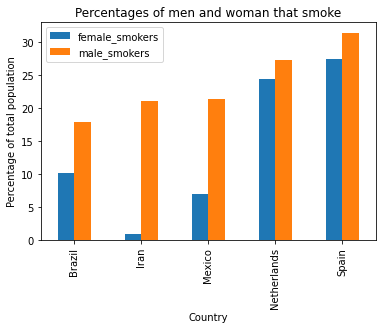

In [50]:
#Comparing the percentages of people that smoke in each country. 
data_smokers = data_covid.groupby("location")[["female_smokers", "male_smokers"]].mean()
data_smokers.sort_values(by="male_smokers", inplace=True)
data_smokers.plot.bar()
plt.title("Percentages of men and woman that smoke")
plt.ylabel('Percentage of total population')
plt.xlabel('Country')

Text(0.5, 0, 'Country')

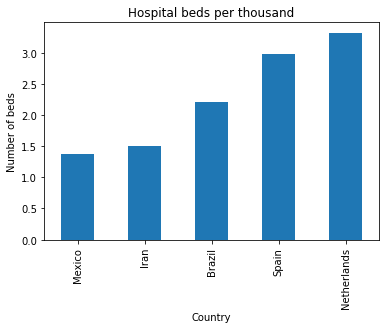

In [52]:
#To obtain an observation of the severity of the situation we will also be comparing the hospital beds per thousand people of each country.
data_hospital_beds = data_covid.groupby("location")["hospital_beds_per_thousand"].mean()
data_hospital_beds.sort_values(inplace=True)
data_hospital_beds.plot.bar()
plt.title("Hospital beds per thousand")
plt.ylabel('Number of beds')
plt.xlabel('Country')


### 5. Conclusions

### 6. Checking for outliers

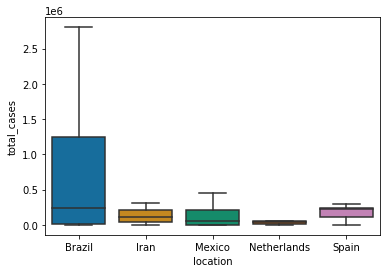

In [54]:
outliers_new_cases = data_covid[["location", "total_cases"]]
sns.boxplot(y='total_cases', x='location', 
                 data=outliers_new_cases, 
                 palette="colorblind")

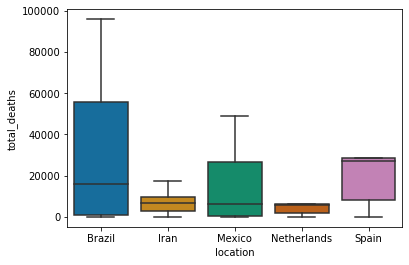

In [56]:
outliers_new_cases = data_covid[["location", "total_deaths"]]
sns.boxplot(y='total_deaths', x='location', 
                 data=outliers_new_cases, 
                 palette="colorblind")

----------------------